In [4]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("Month_Value_1.csv")
df = df.set_index("Period")
df.head(10)

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
01.01.2015,"16,010,072.12","12,729.00","1,257.76","30,024,676.00"
01.02.2015,"15,807,587.45","11,636.00","1,358.51","30,024,676.00"
01.03.2015,"22,047,146.02","15,922.00","1,384.70","30,024,676.00"
01.04.2015,"18,814,583.29","15,227.00","1,235.61","30,024,676.00"
01.05.2015,"14,021,479.61","8,620.00","1,626.62","30,024,676.00"
01.06.2015,"16,783,928.52","13,160.00","1,275.37","30,024,676.00"
01.07.2015,"19,161,892.19","17,254.00","1,110.58","30,024,676.00"
01.08.2015,"15,204,984.30","8,642.00","1,759.43","30,024,676.00"
01.09.2015,"20,603,939.98","16,144.00","1,276.26","30,024,676.00"


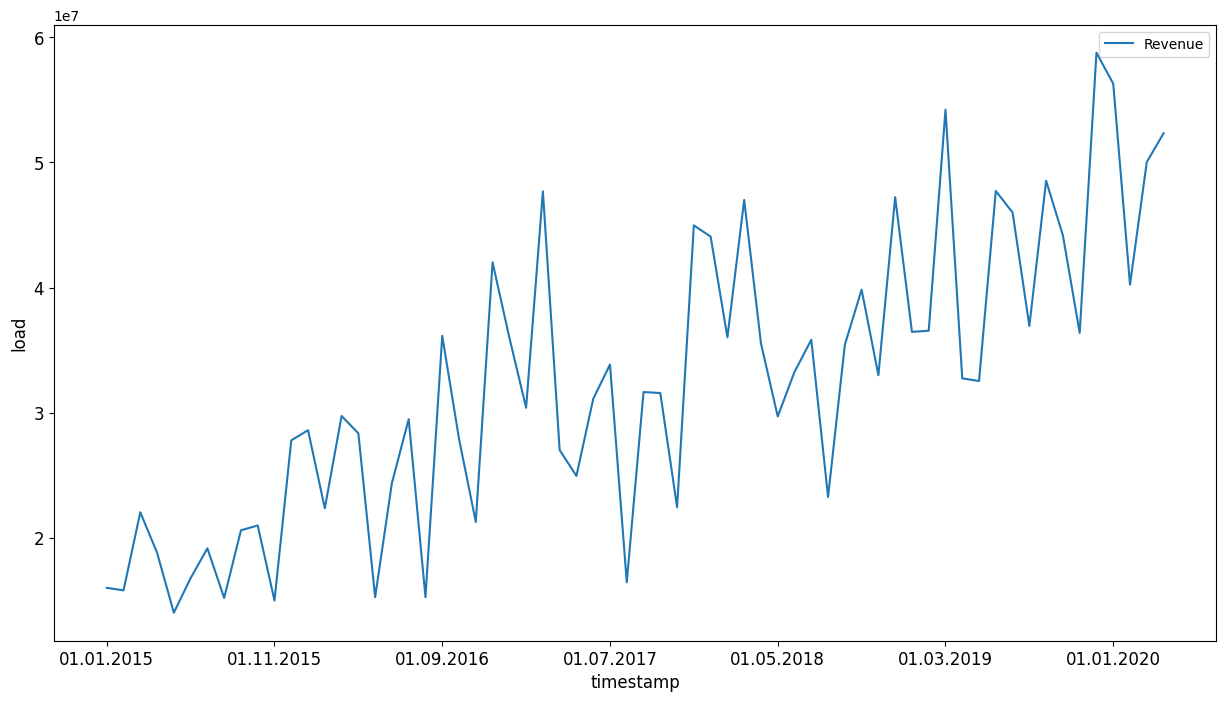

In [21]:
df.plot(y='Revenue', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()
train_start_dt = "01.01.2015"
test_start_dt = "01.10.2015"


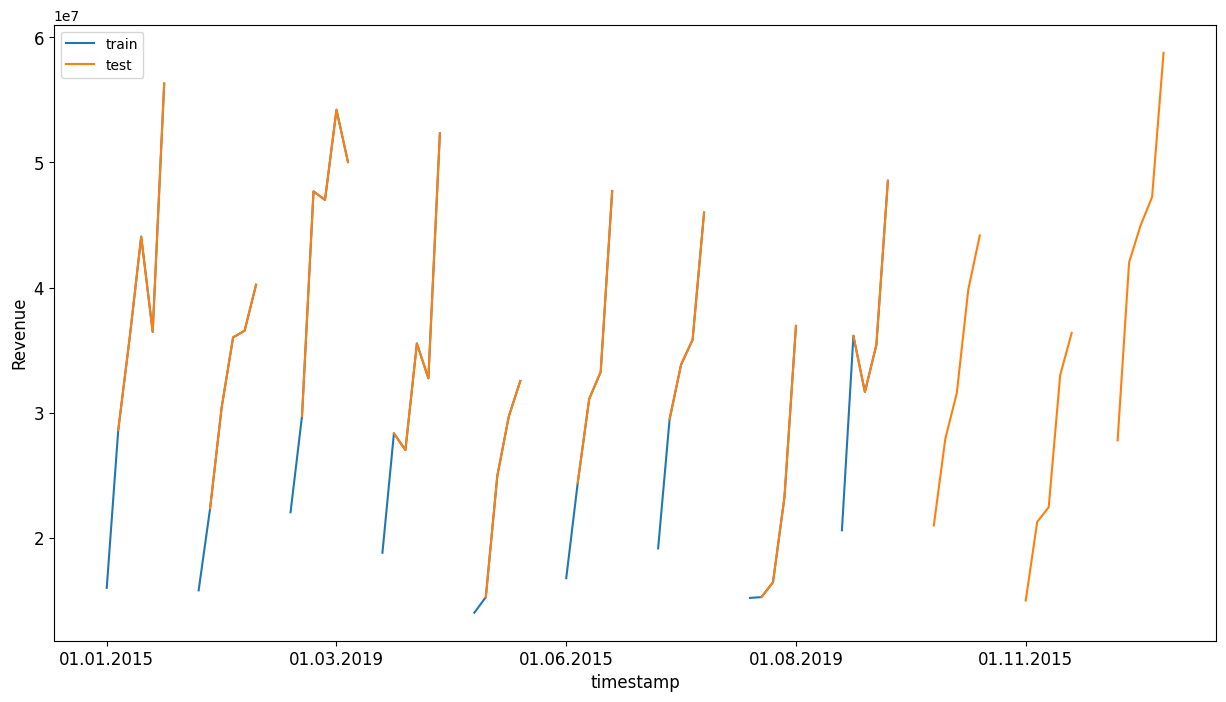

In [22]:
df[(df.index < test_start_dt) & (df.index >= train_start_dt)][['Revenue']].rename(columns={'Revenue':'train'}) \
    .join(df[test_start_dt:][['Revenue']].rename(columns={'Revenue':'test'}), how='outer') \
    .plot(y=['train', 'test'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.show()

In [20]:

train = df.copy()[(df.index >= train_start_dt) & (df.index < test_start_dt)][['Revenue']]
test = df.copy()[df.index >= test_start_dt][['Revenue']]

print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

scaler = MinMaxScaler()
train['Revenue'] = scaler.fit_transform(train)
train.head(10)


Training data shape:  (72, 1)
Test data shape:  (24, 1)


,Revenue
Period,
01.01.2015,0.05
01.02.2015,0.04
01.03.2015,0.19
01.04.2015,0.11
01.05.2015,0.00
01.06.2015,0.07
01.07.2015,0.12
01.08.2015,0.03
01.09.2015,0.16


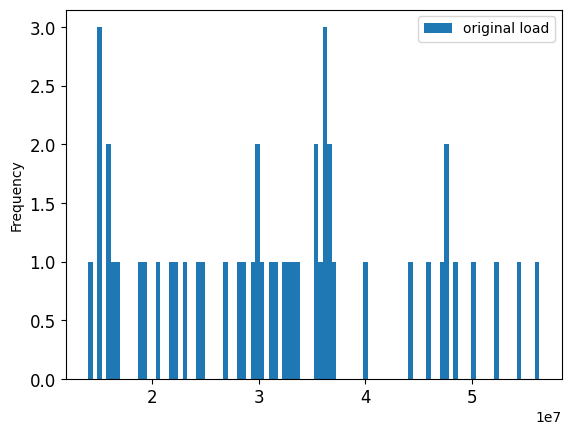

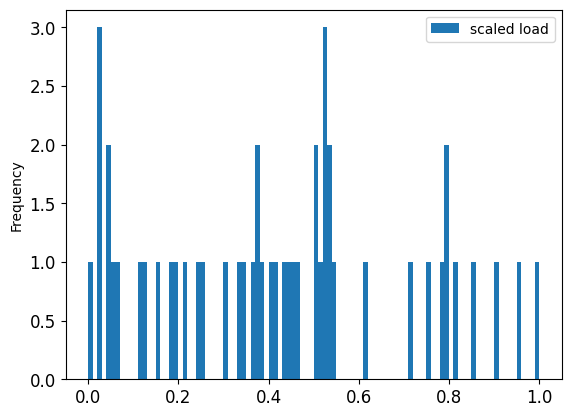

In [23]:
df[(df.index >= train_start_dt) & (df.index < test_start_dt)][['Revenue']].rename(columns={'Revenue':'original load'}).plot.hist(bins=100, fontsize=12)
train.rename(columns={'Revenue':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [28]:
order = (4, 1, 0)
seasonal_order = (1, 1, 0, 24)

model = SARIMAX(endog=train, order=order, seasonal_order=seasonal_order)
results = model.fit()

print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.35084D-02    |proj g|=  1.09960D-01

At iterate    5    f= -1.69846D-02    |proj g|=  5.76094D-02

At iterate   10    f= -2.11600D-02    |proj g|=  6.79352D-02

At iterate   15    f= -2.80654D-02    |proj g|=  1.76305D-02

At iterate   20    f= -2.87298D-02    |proj g|=  3.71671D-02

At iterate   25    f= -2.89104D-02    |proj g|=  3.57774D-02

At iterate   30    f= -2.95309D-02    |proj g|=  5.39843D-02

At iterate   35    f= -2.96891D-02    |proj g|=  3.93769D-02

At iterate   40    f= -2.97789D-02    |proj g|=  1.45513D-02

At iterate   45    f= -2.98231D-02    |proj g|=  5.41199D-02

At iterate   50    f= -2.98491D-02    |proj g|=  3.68074D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau